### Traitement du signal

In [29]:
# importation des packages
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack

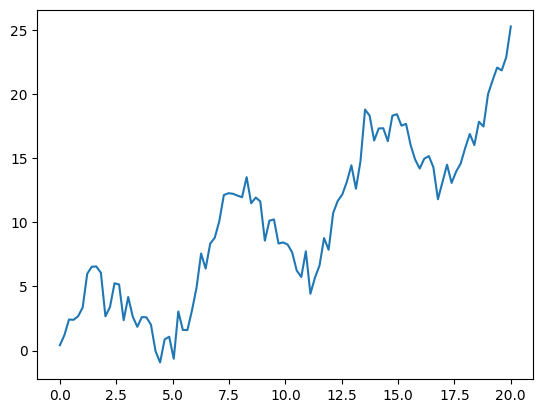

In [25]:
# Création d'un Dataset avec une tendance linéaire
x = np.linspace(0, 20, 100)
y = x + 4*np.sin(x) +np.random.randn(x.shape[0])
plt.plot(x, y)

### Convolution de Filtre

Le module **scipy.signal** contient beaucoup de fonctions de convolution et de filtres pour faire du traitement du signal. La fonction **signal.detrend** est parfaite pour éliminer une tendance linéaire dans un signal. Utile pour beaucoup d'applications !

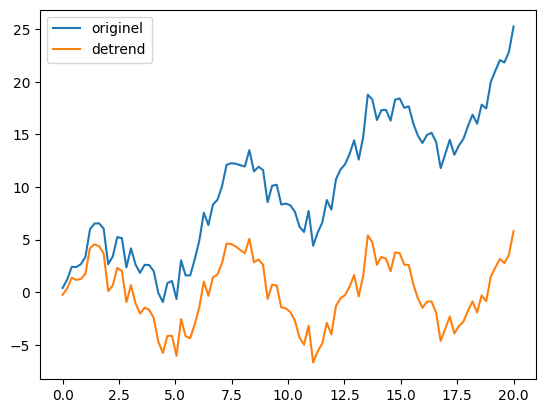

In [27]:
# Élimination de la tendance linéaire
new_y = signal.detrend(y)

# Visualisation des résultats
plt.plot(x, y, label='originel')
plt.plot(x, new_y, label='detrend')
plt.legend()
plt.show()

### Transformation de Fourier (FFT)

La transformation de Fourier est une technique mathématique puissante et normalement complexe a mettre en oeuvre. Heureusement **scipy.fftpack** rend cette technique tres simple a implémenter

La transformation de Fourier permet d'analyser les **fréquences** qui composent un signal **périodique** (qui se répete avec le temps). Cette opération produit un graphique que l'on appelle **Spectre**.

Une fois le **Spectre** généré, il est possible de filtrer les bruits indésirables, ou bien de sélectionner seulement certaines fréquences, ou d'en atténuer d'autres... les possibilités sont infinies.

Dans l'exemple ci-dessous, nous voyons comment filtrer un signal noyé dans du **bruit**.

Le **bruit** est défini comme tout phénomène perturbateur gênant la perception ou l’interprétation d’un signal, par analogie avec les nuisances
acoustiques (interférence, bruit de fond, etc.)


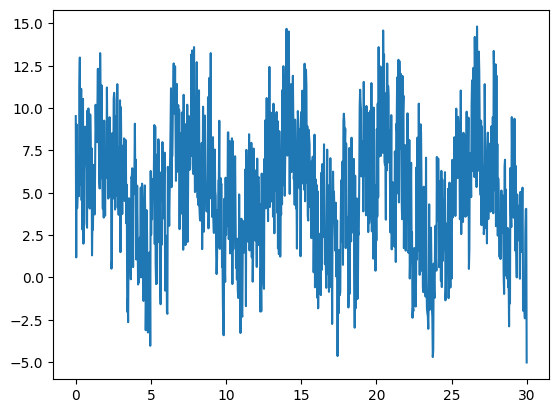

In [28]:
# Création d'un signal périodique noyé dans du bruit.
x = np.linspace(0, 30, 1000)
y = 3*np.sin(x) + 2*np.sin(5*x) + np.sin(10*x) + np.random.random(x.shape[0])*10
plt.plot(x, y)

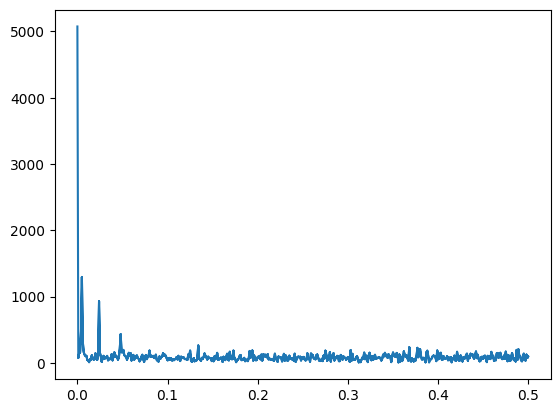

In [30]:
# création des variables Fourier et Fréquences, qui permettent de construire le spectre du signal.
fourier = fftpack.fft(y)
power = np.abs(fourier) # la variable power est créée pour éiminer les amplitudes négatives
frequences = fftpack.fftfreq(y.size)
plt.plot(np.abs(frequences), power)

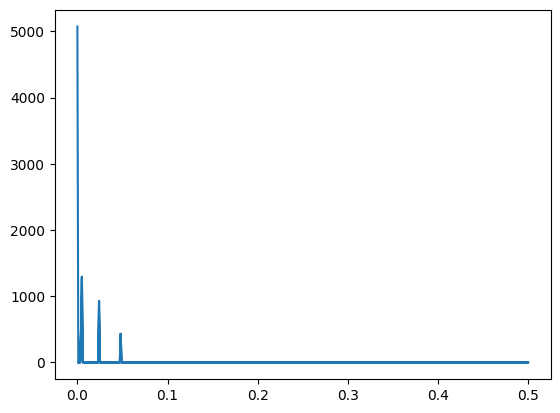

In [31]:
# filtre du spectre avec du boolean indexing de Numpy
fourier[power<400] = 0

# Visualisation du spetre propre
plt.plot(np.abs(frequences), np.abs(fourier))

In [32]:
# Transformation de Fourier Inverse: genere un nouveau signal temporel depuis le spectre filtré
filtered_signal = fftpack.ifft(fourier)

D:\ProgramFiles\miniconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


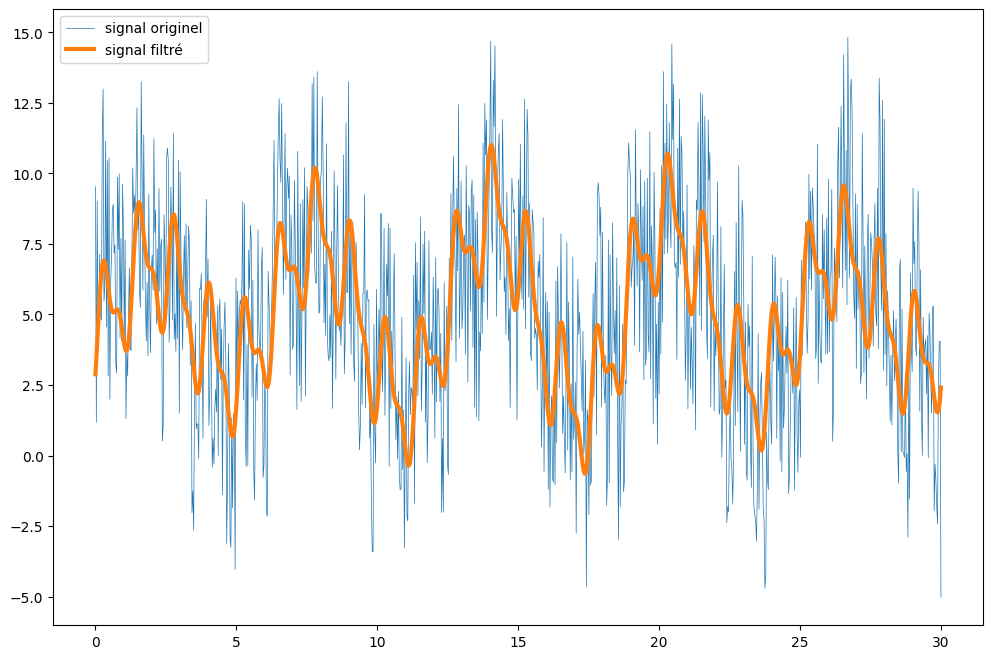

In [33]:
# Visualisation des résultats

plt.figure(figsize=(12, 8))
plt.plot(x, y, lw=0.5, label='signal originel')
plt.plot(x, filtered_signal, lw=3, label='signal filtré')
plt.legend()
plt.show()